In [64]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [65]:
dataset = pd.read_csv("AirPassenger.csv")
#Parse strings to datatime type
dataset['Month']= pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [66]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


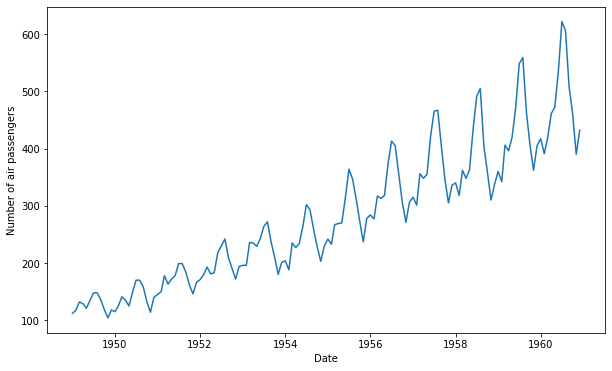

In [67]:
## plot
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [68]:
#Mean and Variance
rolmean = indexedDataset.rolling(window=12).mean()
rolstd =  indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


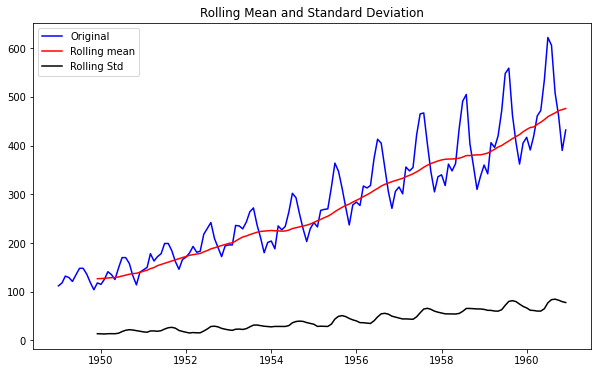

In [69]:
#plot with mean and variance
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label= 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [48]:
#ADCF Test
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)    

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


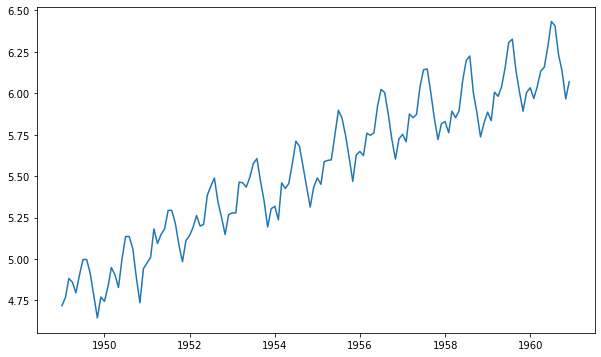

In [51]:
#Trend handling
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


In [52]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset_logScale['#Passengers'], autolag='AIC')
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)   

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


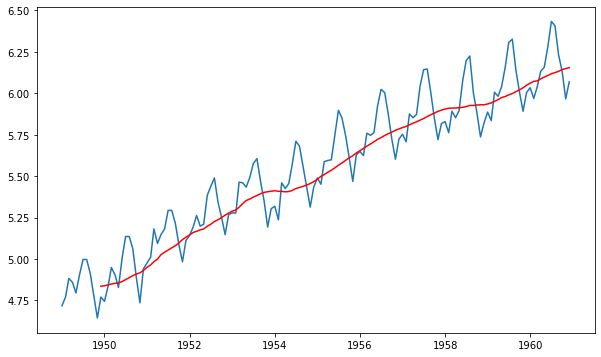

In [53]:

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD= indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')


In [54]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#dealing with NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [55]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(datasetLogScaleMinusMovingAverage['#Passengers'], autolag='AIC')
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)   

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


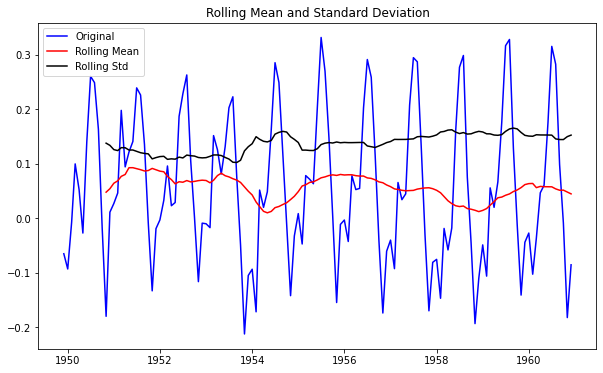

In [63]:
#Determing rolling stastics
movingAverage = datasetLogScaleMinusMovingAverage.rolling(window=12).mean()
movingSTD = datasetLogScaleMinusMovingAverage.rolling(window=12).std()

plt.plot(datasetLogScaleMinusMovingAverage, color='blue', label='Original')
plt.plot(movingAverage, color='red',label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')




print ('Results of Dickey-Fuller Test:')
dftest = adfuller(datasetLogScaleMinusMovingAverage['#Passengers'], autolag='AIC')
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput) 